# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Url for call
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {'appid': weather_api_key,
          'units': 'imperial'}

In [8]:
# Initialize values for for loop - 
# counter to keep track of records for print statement and 
count = 0
# empty list to store weather data to make into
city_weather = []

print(f'Beginning Data Retrieval')
print('-----------------------------')

# for loop to iterate through cities selected
for city in cities:
    print(f'Processing Record {count} | {city.title()}')

    count += 1
    # Set URL paramater for the location
    params['q'] = city.title()
    
    # Exception handling - if city is not in OpenWeather API skip
    try:
        # Build query URL
        weather_response = requests.get(url = url, params = params)
        weather_data = weather_response.json()
        
        # Create dictionary for data from API call
        weather = {}
        
        # Create key's and assign data to it based on API call
        weather['City'] = city
        weather['Lat'] = weather_data['coord']['lat']
        weather['Lng'] = weather_data['coord']['lon']
        weather['Max Temp'] = weather_data['main']['temp_max']
        weather['Humidity'] = weather_data['main']['humidity']
        weather['Cloudiness'] = weather_data['clouds']['all']
        weather['Wind Speed'] = weather_data['wind']['speed']
        weather['Country'] = weather_data['sys']['country']
        weather['Date'] = weather_data['dt']
        # Add dictionary to end of list
        city_weather.append(weather)
    except:
        print(f'City not found. Skipping...')
        continue


print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 | Aklavik
Processing Record 1 | Illoqqortoormiut
City not found. Skipping...
Processing Record 2 | Port Elizabeth
Processing Record 3 | Shakawe
Processing Record 4 | Butaritari
Processing Record 5 | Port-Cartier
Processing Record 6 | Hobyo
Processing Record 7 | Vaini
Processing Record 8 | Hermanus
Processing Record 9 | Nizhneyansk
City not found. Skipping...
Processing Record 10 | Mataura
Processing Record 11 | Ushuaia
Processing Record 12 | Longyearbyen
Processing Record 13 | Barrow
Processing Record 14 | Nanortalik
Processing Record 15 | Palmer
Processing Record 16 | Boa Vista
Processing Record 17 | Punta Arenas
Processing Record 18 | Port Alfred
Processing Record 19 | Beloha
Processing Record 20 | Khonuu
City not found. Skipping...
Processing Record 21 | Busselton
Processing Record 22 | Lata
Processing Record 23 | Atuona
Processing Record 24 | Jamestown
Processing Record 25 | Rikitea
Processing Record 26 | Dw

Processing Record 230 | Arraial Do Cabo
Processing Record 231 | Pacific Grove
Processing Record 232 | Svetlogorsk
Processing Record 233 | Aden
Processing Record 234 | Ilulissat
Processing Record 235 | Kamaishi
Processing Record 236 | Zhangye
Processing Record 237 | Karaul
City not found. Skipping...
Processing Record 238 | Cherskiy
Processing Record 239 | Praia
Processing Record 240 | Puerto Baquerizo Moreno
Processing Record 241 | Yarmouth
Processing Record 242 | Ngukurr
City not found. Skipping...
Processing Record 243 | Strezhevoy
Processing Record 244 | Iqaluit
Processing Record 245 | Kirakira
Processing Record 246 | Butia
Processing Record 247 | Vaitape
Processing Record 248 | Chuy
Processing Record 249 | Sinnar
Processing Record 250 | Genhe
Processing Record 251 | Parintins
Processing Record 252 | Jiddah
City not found. Skipping...
Processing Record 253 | Kruisfontein
Processing Record 254 | Kaitangata
Processing Record 255 | Husavik
Processing Record 256 | Faya
Processing Record

Processing Record 462 | Batagay
Processing Record 463 | Savinskiy
Processing Record 464 | Bira
Processing Record 465 | Camargo
Processing Record 466 | Lircay
Processing Record 467 | Moree
Processing Record 468 | Marystown
Processing Record 469 | Coihaique
Processing Record 470 | Nyimba
Processing Record 471 | Tortosa
Processing Record 472 | Khanpur
Processing Record 473 | Siguiri
Processing Record 474 | Salalah
Processing Record 475 | Marcona
City not found. Skipping...
Processing Record 476 | Saraland
Processing Record 477 | Chernyshevskiy
Processing Record 478 | Nome
Processing Record 479 | Laguna
Processing Record 480 | Mweka
Processing Record 481 | Yamada
Processing Record 482 | Berlevag
Processing Record 483 | Russell
Processing Record 484 | Blairmore
Processing Record 485 | San Policarpo
Processing Record 486 | Pinega
Processing Record 487 | Broome
Processing Record 488 | Waw
Processing Record 489 | Sembe
Processing Record 490 | Atuntaqui
Processing Record 491 | Rongcheng
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create DataFrame with raw data (list of dictionaries) from API call
city_weather_df = pd.DataFrame(city_weather)

# Display DataFrame
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,32.83,93,100,20.76,CA,1632887227
1,port elizabeth,-33.9180,25.5701,57.49,72,0,11.50,ZA,1632887016
2,shakawe,-18.3667,21.8500,66.34,25,21,5.84,BW,1632887228
3,butaritari,3.0707,172.7902,83.28,74,73,18.34,KI,1632886986
4,port-cartier,50.0334,-66.8654,43.75,82,93,4.32,CA,1632887229
...,...,...,...,...,...,...,...,...,...
569,gamba,-2.6500,10.0000,75.24,87,100,6.80,GA,1632887442
570,pingdu,36.7844,119.9464,72.84,57,13,5.73,CN,1632887442
571,capitao poco,-1.7464,-47.0594,71.11,98,17,4.16,BR,1632887443
572,mulchen,-37.7167,-72.2333,42.17,80,48,1.70,CL,1632887443


In [10]:
# Round Lat and Lng to 2 decimal places
city_weather_df['Lat'] = round(city_weather_df['Lat'],2)
city_weather_df['Lng'] = round(city_weather_df['Lng'],2)

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.22,-135.01,32.83,93,100,20.76,CA,1632887227
1,port elizabeth,-33.92,25.57,57.49,72,0,11.50,ZA,1632887016
2,shakawe,-18.37,21.85,66.34,25,21,5.84,BW,1632887228
3,butaritari,3.07,172.79,83.28,74,73,18.34,KI,1632886986
4,port-cartier,50.03,-66.87,43.75,82,93,4.32,CA,1632887229
...,...,...,...,...,...,...,...,...,...
569,gamba,-2.65,10.00,75.24,87,100,6.80,GA,1632887442
570,pingdu,36.78,119.95,72.84,57,13,5.73,CN,1632887442
571,capitao poco,-1.75,-47.06,71.11,98,17,4.16,BR,1632887443
572,mulchen,-37.72,-72.23,42.17,80,48,1.70,CL,1632887443


In [11]:
# Save DataFrame to .csv
city_weather_df.to_csv('data/city_weather_data.csv')

In [12]:
# Create and Display summary DataFrame
summary_df = city_weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,18.752282,18.633937,65.003345,71.540070,53.393728,7.462422,1.632887e+09
std,33.161284,89.809944,16.948833,20.158559,38.924077,5.677811,1.066476e+02
min,-54.800000,-175.200000,23.720000,10.000000,0.000000,0.000000,1.632887e+09
25%,-8.155000,-56.677500,51.860000,62.000000,12.000000,3.357500,1.632887e+09
50%,21.125000,23.350000,69.200000,75.000000,61.000000,5.840000,1.632887e+09
75%,47.957500,98.097500,78.742500,87.000000,93.000000,10.360000,1.632887e+09
max,78.220000,172.790000,98.580000,100.000000,100.000000,40.290000,1.632887e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Initializing count and empty list to store indexes
count = 0
humidity_indexes_to_drop = []

# Find all Indexes with Humidity over 100%
for value in city_weather_df['Humidity']:
    if value > 100 == True:
        humidity_indexes_to_drop.append(count)
        count += 1
    else:
        count += 1

# Display indexes to drop
if humidity_indexes_to_drop == []:
    print('Nothing to drop')
else:
    print(f'Drop indexes {humidity_indexes_to_drop}')


Nothing to drop


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Skipped since no outlier values

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

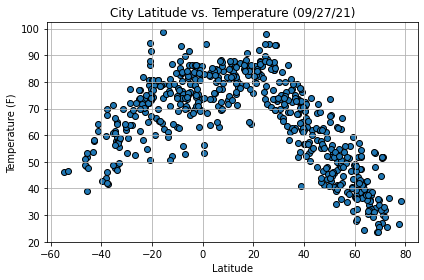

In [15]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Temperature (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_temp.png")
plt.show()

The above scatter plot shows the relationship between temperature and latitude. When latidute is equal to 0 you are at the equator which experiences the highest temperatures. Temperatures decrease as you go further North or South. This is likely a negative parabolic relationship.

## Latitude vs. Humidity Plot

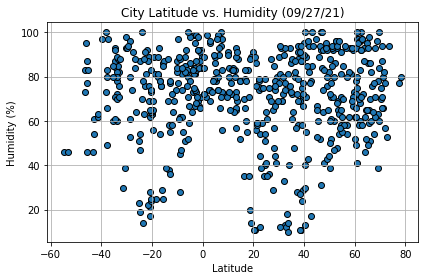

In [16]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Humidity (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_humidity.png")
plt.show()

The above scatter plot shows the relationship between Latitude and humidity. This shows that at any latitude, based on the cities evaluated, you can have a wide range of humidity % with the majority of locations tending towards a higher humid index.

## Latitude vs. Cloudiness Plot

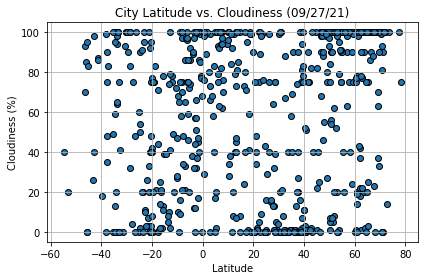

In [17]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_cloudiness.png")
plt.show()

The above scatter plot shows the relationship between Latitude and cloudiness. This shows that at any latitude, based on the cities evaluated, you can have a wide range of cloudiness. There is a slight tendancy for locations from -40 to -20 and 20 to 40 latitude to have low cloudiness, -20 to 20 and 40 to 60 to have very high cloudiness.

## Latitude vs. Wind Speed Plot

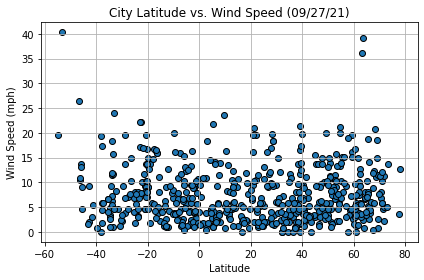

In [18]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_windspeed.png")
plt.show()

The above scatter plot shows the relationship between Latitude and wind speeds. This shows that across all latitudes, wind speed does not tend to go above 25 mph in September for the citites selected. 

## Linear Regression

In [19]:
# Create bins for different Hemispheres
bins = [-90, -.1, 90]

group_names = ['Southern Hemisphere', 'Northern Hemisphere']

city_weather_df["Hemisphere"] = pd.cut(city_weather_df['Lat'], bins, 
                                  labels=group_names, include_lowest=True)

#Filter by the bins
north_df = city_weather_df[city_weather_df['Hemisphere']=="Northern Hemisphere"]
south_df = city_weather_df[city_weather_df['Hemisphere']=="Southern Hemisphere"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8509984102754785


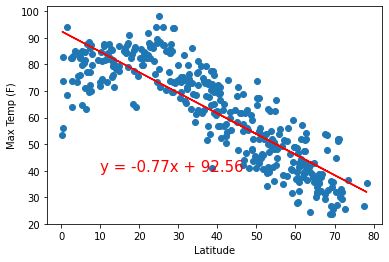

In [20]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_maxtemp_regression.png")
plt.show()

This plot shows that temperature and latitude in the northern hemisphere has a strong negative coorelation. The further North you go away from the equater, the lower temperatures drop in the month of September.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6780964867118411


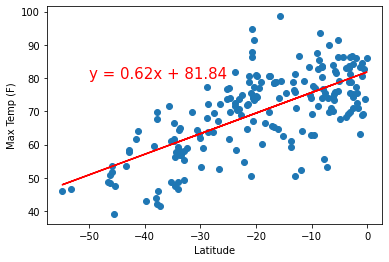

In [21]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_maxtemp_regression.png")
plt.show()

This plot shows that temperature and latitude in the southern hemisphere has a strong positive coorelation. The further North you go towards the equater, the higher temperatures increase in the month of September.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03752695234581949


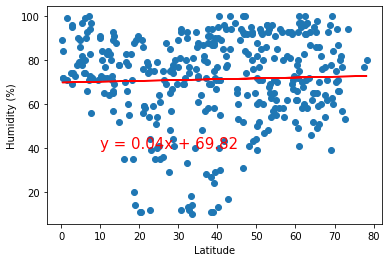

In [22]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_humidity_regression.png")
plt.show()

This plot shows that there is a very weak correlation between Humidity and Latitude in the Northern Hemisphwere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10593058004099158


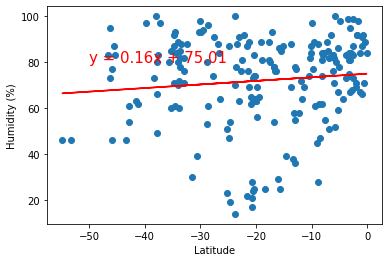

In [28]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_humidity_regression.png")
plt.show()

This plot shows that there is a weak correlation between Humidity and Latitude in the Southern Hemisphwere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10692171720632192


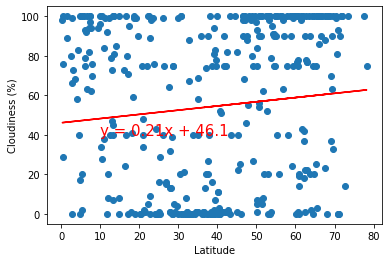

In [24]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_cloudiness_regression.png")
plt.show()

This plot shows that there is a weak correlation between Cloudiness and Latitude in the Northern Hemisphwere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03473978348749597


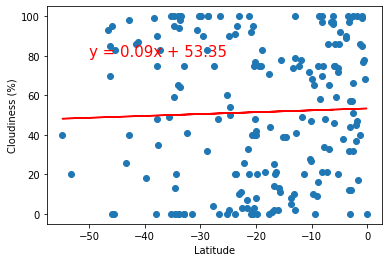

In [29]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_cloudiness_regression.png")
plt.show()

This plot shows that there is a very weak correlation between Cloudiness and Latitude in the Southern Hemisphwere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12917000389613115


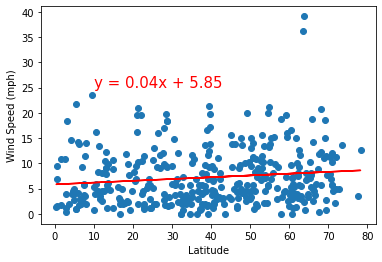

In [30]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_windspeed_regression.png")
plt.show()

This plot shows that there is a weak correlation between Windspeeds and Latitude in the Northern Hemisphwere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22054718992238814


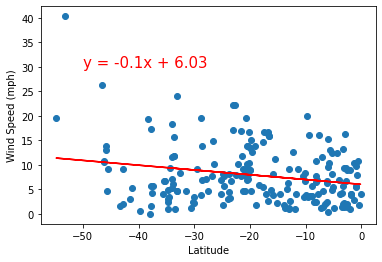

In [32]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_windspeed_regression.png")
plt.show()

This plot shows that there is a weak negative correlation between Windspeeds and Latitude in the Southern Hemisphwere.